[View in Colaboratory](https://colab.research.google.com/github/sqlwu/kaggle/blob/master/Titanic_Kaggle.ipynb)

In [250]:

!pip install xlrd

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.5)

print('successful')

successful


In [251]:
# acquire data
from google.colab import files

uploads = files.upload()

test_data = pd.read_csv('test_Titanic.csv')
train_data = pd.read_csv('train_Titanic.csv')


Saving test_Titanic.csv to test_Titanic (10).csv
Saving train_Titanic.csv to train_Titanic (10).csv


In [222]:
# 查看資料本身
print("test data set shape: ", test_data.shape) # 看有幾個rows & columns
test_data.head()


('test data set shape: ', (418, 11))


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:

test_data.info()
# Age ; Fare ; Cabin 有缺值 --> 要補值

print('==================')

train_data.info()
# Age ; Cabin ; Embarked 有缺值 --> 要補值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float6

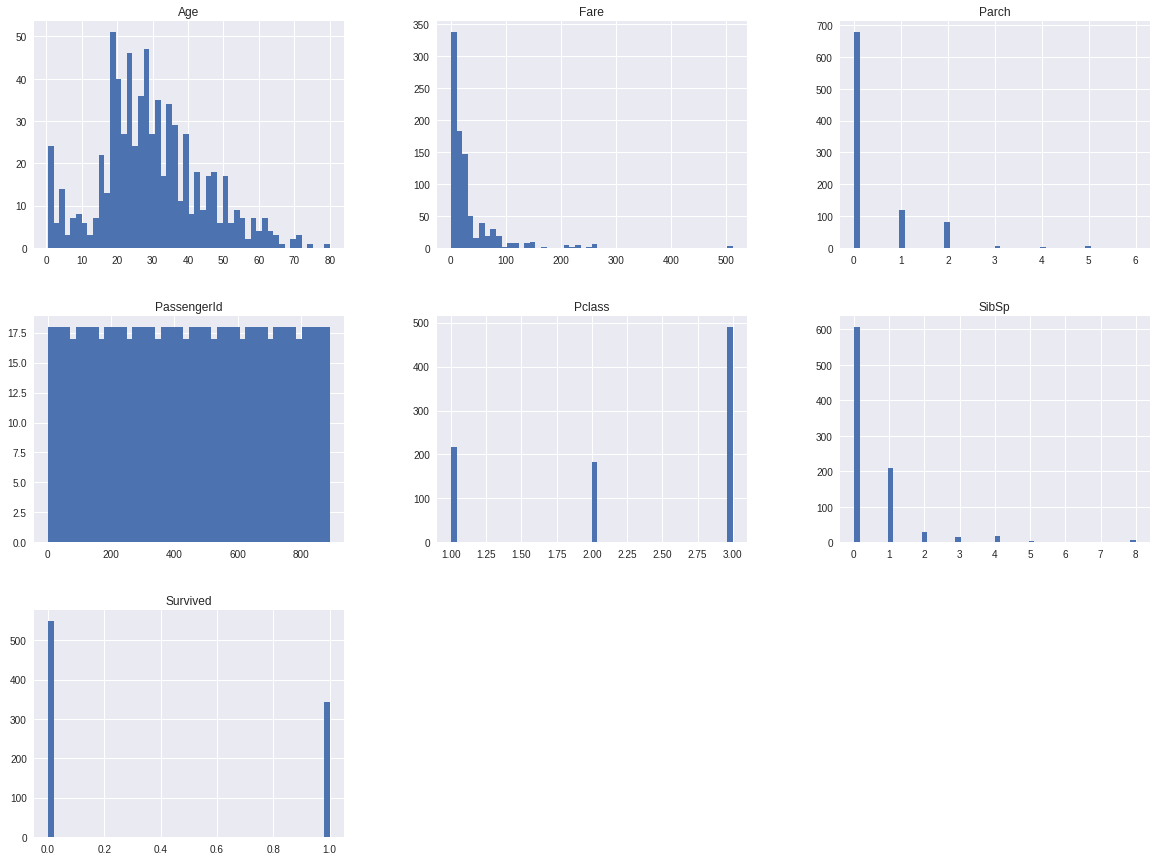

In [153]:
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

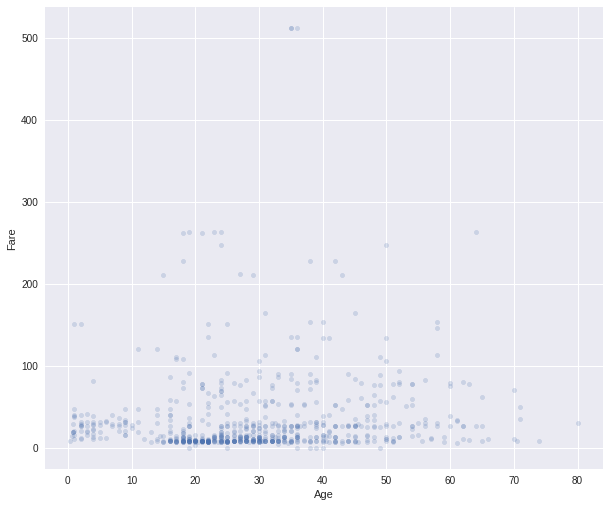

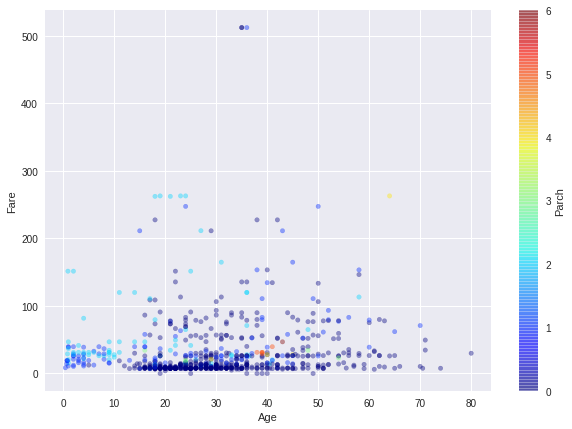

In [154]:
train_data.plot(kind="scatter", x="Age", y="Fare", alpha=0.2)
plt.savefig('map1.png')

train_data.plot(kind="scatter", x="Age", y="Fare", alpha=0.4, figsize=(10,7),
    c="Parch", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

In [194]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


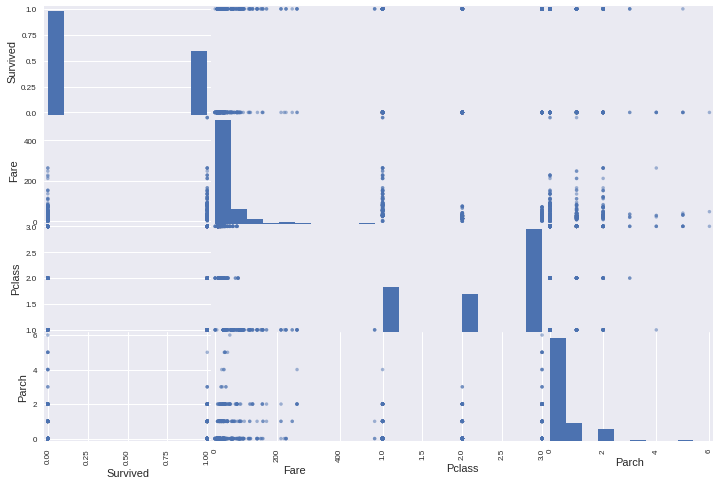

In [156]:
from pandas.tools.plotting import scatter_matrix
attributes = ["Survived", "Fare", "Pclass", "Parch"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

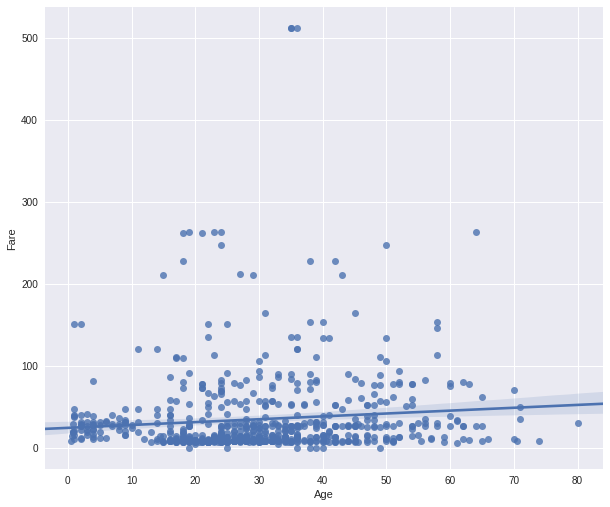

In [157]:
# 畫出scatter plot
sns.regplot(x = train_data.Age, y = train_data.Fare, dropna = True)

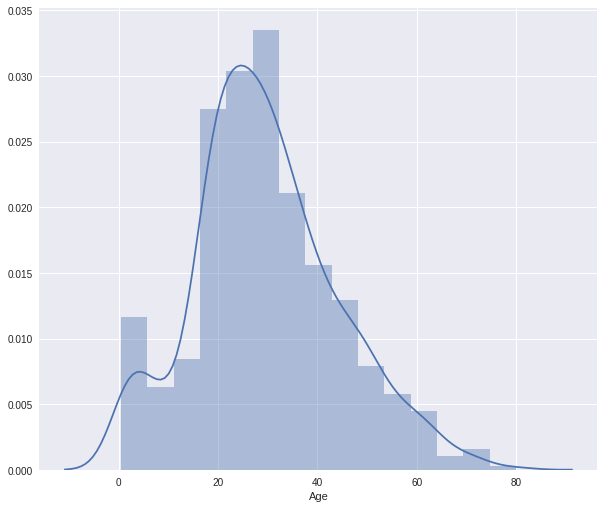

In [158]:
sns.distplot(train_data["Age"].dropna(), bins = 15, kde = True) #kde 為真 可以顯示曲線


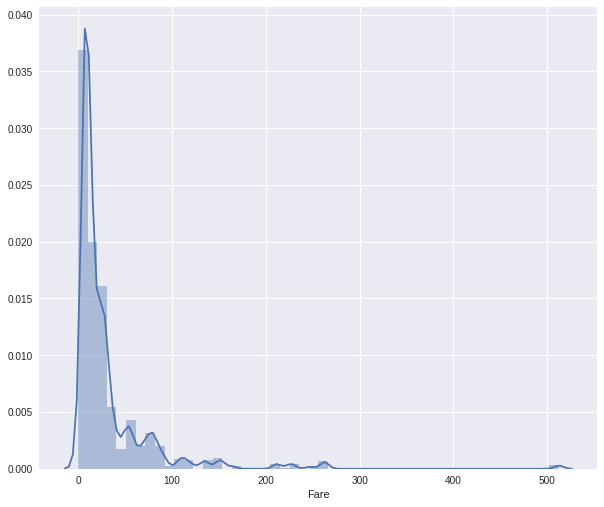

In [122]:
sns.distplot(train_data["Fare"]) #左偏

In [195]:
# observe the categorical data
train_data.describe(include=['O']) # string type data 顯示離散型資料 適合專利的書目資料分析 unique 該資料有幾種 top 最常出現的 freq 表示top出現的頻率

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


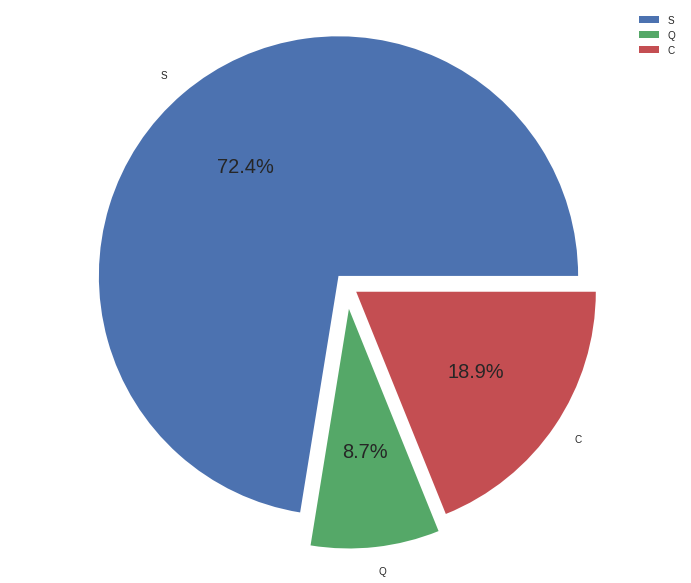

In [160]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0
size = [sum(train_data.Embarked == "S"), sum(train_data.Embarked == "Q"), sum(train_data.Embarked == "C")]
explode = (0.05, 0.1, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=["S","Q","C"],autopct='%1.1f%%',explode=explode)
ax1.axis('equal')
plt.legend(labels = ["S","Q","C"], loc= "best")
plt.tight_layout()
plt.show()

In [252]:
#資料數對齊891
dftrain = train_data.drop('Cabin', 1) #刪除欄位
#dftrain = dftrain.drop('Cabin', 1) #刪除欄位
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [253]:
dftrain = dftrain.dropna()#直接删除含有缺失值的行
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [163]:
pd.get_dummies(dftrain['Embarked'], prefix='Embarked') #將類別欄位與各筆資料ＭＡＰＰＩＮＧ

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


In [254]:
onhot_encoding = pd.get_dummies(dftrain['Embarked'], prefix='Embarked') #產生上述欄位
dftrain = dftrain.drop('Embarked', 1) #刪除欄位
dftrain = pd.concat([onhot_encoding, dftrain], axis=1) #將刪除後的dftrain＋onhot_encoding
dftrain

,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,0,0,1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,0,0,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
6,0,0,1,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,0,0,1,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750
8,0,0,1,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333
9,1,0,0,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708
10,0,0,1,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000


In [165]:
dftrain.describe() #看數值型資料

,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.182584,0.039326,0.778090,448.589888,0.404494,2.240169,29.642093,0.432584,34.567251
std,0.386597,0.194506,0.415823,258.683191,0.491139,0.836854,14.492933,0.854181,52.938648
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,222.750000,0.000000,1.000000,20.000000,0.000000,8.050000
50%,0.000000,0.000000,1.000000,445.000000,0.000000,2.000000,28.000000,0.000000,15.645850
75%,0.000000,0.000000,1.000000,677.250000,1.000000,3.000000,38.000000,1.000000,33.000000
max,1.000000,1.000000,1.000000,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


In [166]:
dftrain.describe(include=['O']) # 顯示類別型資料 unique 該資料有幾種 top 最常出現的 freq 表示top出現的頻率

,Name,Sex,Ticket
count,712,712,712
unique,712,2,541
top,"Graham, Mr. George Edward",male,347082
freq,1,453,7


In [255]:
dftrain = dftrain.drop('PassengerId', 1) #刪除欄位
dftrain = dftrain.drop('Name', 1) #刪除欄位
dftrain = dftrain.drop('Ticket', 1) #刪除欄位
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
Survived      712 non-null int64
Pclass        712 non-null int64
Sex           712 non-null object
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 46.6+ KB


In [256]:
#處理類別資料一
class_mapping1 = {label:idx for idx,label in
enumerate(np.unique(dftrain['Sex']))}
class_mapping1

{'female': 0, 'male': 1}

In [257]:
dftrain['Sex'] = dftrain['Sex'].map(class_mapping1) #將上述Sex 改用 數字取代
dftrain.head()

,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0,1,0,3,1,22.0,1,0,7.2500
1,1,0,0,1,1,0,38.0,1,0,71.2833
2,0,0,1,1,3,0,26.0,0,0,7.9250
3,0,0,1,1,1,0,35.0,1,0,53.1000
4,0,0,1,0,3,1,35.0,0,0,8.0500


In [258]:
dflabel = dftrain #準備標籤資料
dftrain = dftrain.drop('Survived', 1) #刪除欄位
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
Pclass        712 non-null int64
Sex           712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB


In [259]:
#切割為標籤資料
dflabel = dflabel.drop('Embarked_C', 1) #刪除欄位
dflabel = dflabel.drop('Embarked_Q', 1) #刪除欄位
dflabel = dflabel.drop('Embarked_S', 1) #刪除欄位
dflabel = dflabel.drop('Pclass', 1) #刪除欄位
dflabel = dflabel.drop('Sex', 1) #刪除欄位
dflabel = dflabel.drop('Age', 1) #刪除欄位
dflabel = dflabel.drop('SibSp', 1) #刪除欄位
dflabel = dflabel.drop('Parch', 1) #刪除欄位
dflabel = dflabel.drop('Fare', 1) #刪除欄位
dflabel.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [260]:
#確認資料
dftrain.info()

print('==================')

dflabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
Pclass        712 non-null int64
Sex           712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 1 columns):
Survived    712 non-null int64
dtypes: int64(1)
memory usage: 11.1 KB


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dftrain, dflabel, test_size=0.2) #區分訓練與驗證資料
print(X_train.shape)
print(X_test.shape)

(569, 9)
(143, 9)


In [263]:
#處理測試資料
dftest = test_data.drop('Cabin', 1) #刪除欄位
#dftest = dftest.drop('Cabin', 1) #刪除欄位

dftest = dftest.drop('PassengerId', 1) #刪除欄位
dftest = dftest.drop('Name', 1) #刪除欄位
dftest = dftest.drop('Ticket', 1) #刪除欄位

dftest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [264]:
#處理類別資料一 FOR TEST
class_mapping2 = {label:idx for idx,label in
enumerate(np.unique(dftest['Sex']))}

dftest['Sex'] = dftest['Sex'].map(class_mapping2) #將上述Sex 改用 數字取代
dftest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [265]:
onhot_encoding_test = pd.get_dummies(dftest['Embarked'], prefix='Embarked') #產生上述欄位
dftest = dftest.drop('Embarked', 1) #刪除欄位
dftest = pd.concat([onhot_encoding_test, dftest], axis=1) #將刪除後的 dftest＋onhot_encoding_test
dftest

,Embarked_C,Embarked_Q,Embarked_S,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,1,34.5,0,0,7.8292
1,0,0,1,3,0,47.0,1,0,7.0000
2,0,1,0,2,1,62.0,0,0,9.6875
3,0,0,1,3,1,27.0,0,0,8.6625
4,0,0,1,3,0,22.0,1,1,12.2875
5,0,0,1,3,1,14.0,0,0,9.2250
6,0,1,0,3,0,30.0,0,0,7.6292
7,0,0,1,2,1,26.0,1,1,29.0000
8,1,0,0,3,0,18.0,0,0,7.2292
9,0,0,1,3,1,21.0,2,0,24.1500


In [266]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass        418 non-null int64
Sex           418 non-null int64
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [267]:
#dftest = dftest.dropna()#直接删除含有缺失值的行
#dftest = dftest.fillna(0)#用0填充
#dftest = dftest.fillna(method='pad')#用前一个数值填充

dftest = dftest.fillna(dftest['Fare'].mean())#用该列均值填充
dftest = dftest.fillna(dftest['Age'].mean())#用该列均值填充

dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [268]:
#確認資料
dftrain.info()

print('==================')

dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
Pclass        712 non-null int64
Sex           712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [269]:
#訓練模型 內部驗證
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

from sklearn import metrics
print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

Accuracy:0.81
[[74 10]
 [17 42]]


In [270]:
#測試LogisticRegression模型 產生預測值
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(dftrain,dflabel)
y_test_pred = model.predict(dftest)
y_test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [246]:
#使用隨機森林 TRAINING
from sklearn import ensemble 
model = ensemble.RandomForestClassifier()

model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn import metrics
print('Accuracy:%.2f'%metrics.accuracy_score(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.75
[[43  9]
 [ 9 11]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [247]:
X_train, X_test, y_train, y_test = train_test_split(dftrain, dflabel, test_size=0.1) #調整驗證比
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn import metrics
print('Accuracy:%.2f'%metrics.accuracy_score(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.79
[[35  9]
 [ 6 22]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [248]:
#使用隨機森林 TESTING
from sklearn import ensemble 
model = ensemble.RandomForestClassifier()

model.fit(dftrain, dflabel)
y_test_pred = model.predict(dftest)
y_test_pred

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [322]:
#類神經網路 training model I
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
mlp.fit(dftrain, dflabel)                         
print mlp.n_layers_
print mlp.n_iter_
print mlp.loss_
print mlp.out_activation_

4
201
0.4449231543579459
logistic


In [323]:
#類神經網路 testing model I
y_test_pred = mlp.predict(dftest)
y_test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [321]:
#類神經網路 training model II
from sklearn.neural_network import MLPClassifier

X = dftrain
y = dflabel

clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf1.fit(X, y)

print clf1.n_layers_
print clf1.n_iter_
print clf1.loss_
print clf1.out_activation_

y_test_pred = clf1.predict(dftest)
y_test_pred

3
201
0.42784918060027033
logistic


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [326]:
#支持向量機SVC
import numpy as np
import pandas as pd
from sklearn import cross_validation, svm, preprocessing, metrics

# 載入資料
#url = "https://storage.googleapis.com/2017_ithome_ironman/data/kaggle_titanic_train.csv"
titanic_train = train_data #pd.read_csv(url)
titanic_test = test_data 

# 填補遺漏值
age_median = np.nanmedian(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age

age_median1 = np.nanmedian(titanic_test["Age"])
new_Age1 = np.where(titanic_test["Age"].isnull(), age_median1, titanic_test["Age"])
titanic_test["Age"] = new_Age1

# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])

label_encoder1 = preprocessing.LabelEncoder()
encoded_Sex1 = label_encoder1.fit_transform(titanic_test["Sex"])

# 建立訓練與測試資料
titanic_X = pd.DataFrame([titanic_train["Pclass"],
                         encoded_Sex,
                         titanic_train["Age"]
]).T
titanic_y = titanic_train["Survived"]
train_X, test_X, train_y, test_y = cross_validation.train_test_split(titanic_X, titanic_y, test_size = 0.3)

titanic_P = pd.DataFrame([titanic_test["Pclass"],
                         encoded_Sex1,
                         titanic_test["Age"]
]).T
titanic_P.head()


,Pclass,Unnamed 0,Age
0,3.0,1.0,34.5
1,3.0,0.0,47.0
2,2.0,1.0,62.0
3,3.0,1.0,27.0
4,3.0,0.0,22.0


In [331]:
# 建立 SVC 模型
svc = svm.SVC()
svc_fit = svc.fit(train_X, train_y)

# 預測
test_y_predicted = svc.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

#
y_test_pred = svc.predict(titanic_P)
y_test_pred

0.7798507462686567


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
#產生一個長度跟test data一樣的序列，50%的機率是0，50%的機率是1
rand_labels = (np.random.rand(len(test_data['PassengerId'])) > 0.5).astype(np.int32)

results = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : y_test_pred
})

results.to_csv('testresult.csv')
files.download('testresult.csv')